In [1]:
import pandas as pd
import joblib
import json
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_auc_score, roc_curve, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns
 
model = joblib.load('./models/lgbm_model.pkl')
scaler = joblib.load('./models/scaler.pkl')
encoder = joblib.load('./models/encoder.pkl')

df_test = pd.read_csv('./data/test_data.csv')

X_test = df_test.drop('Churn', axis=1)
y_test = df_test['Churn']

In [2]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [3]:
print(classification_report(y_test, y_pred))
print(f"AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1035
           1       0.53      0.79      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.76      0.77      1409

AUC Score: 0.8383


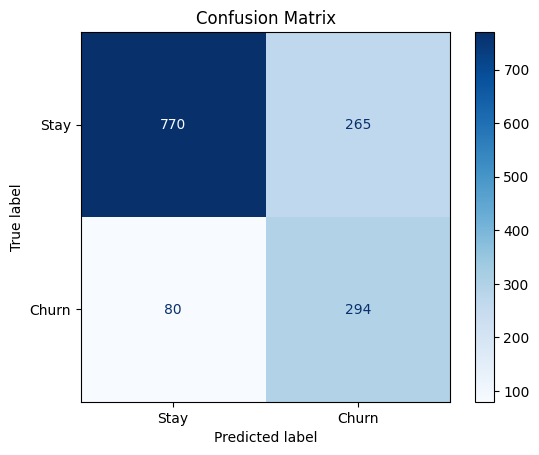

In [4]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Stay", "Churn"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

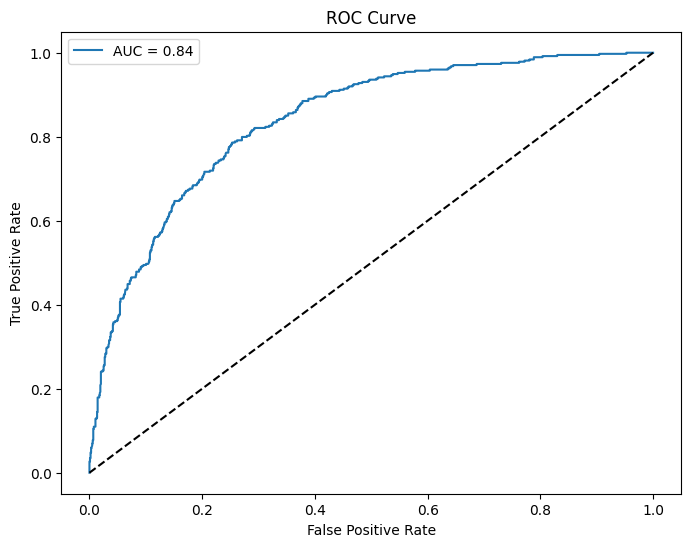

In [5]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

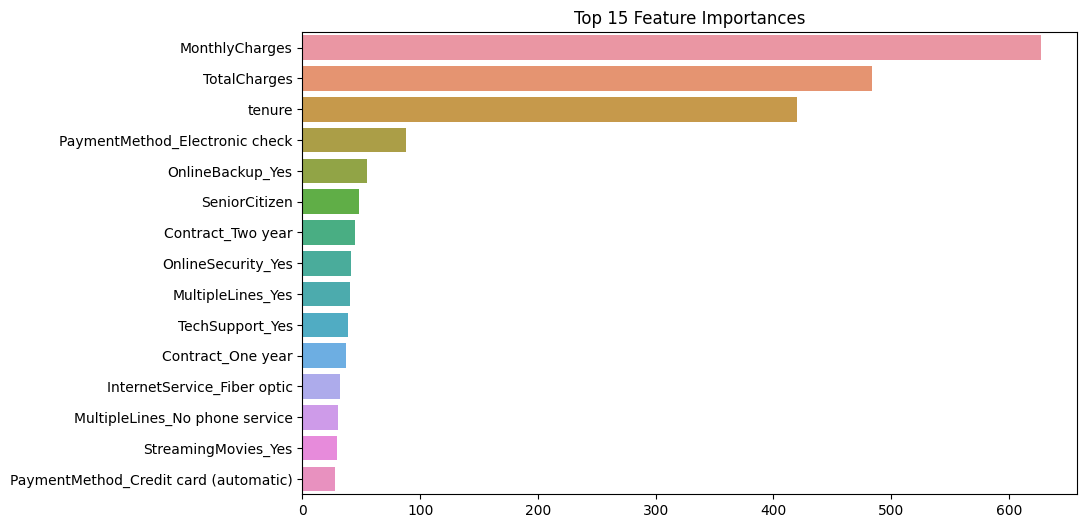

In [6]:
feature_names = X_test.columns

importance = model.feature_importances_

feat_imp = pd.Series(importance, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values[:15], y=feat_imp.index[:15])
plt.title("Top 15 Feature Importances")
plt.show()

In [7]:
metrics = {
    "classification_report": classification_report(y_test, y_pred, output_dict=True),
    "auc_score": roc_auc_score(y_test, y_prob)
}

with open('./outputs/metrics.json', 'w') as f:
    json.dump(metrics, f)